### Data Shifting Experiment

### MIMIC CXR

* [Dataset](https://physionet.org/content/mimic-cxr/2.0.0/)

* [Original Paper](https://www.nature.com/articles/s41597-019-0322-0)

In [1]:
%cd ..

/home/datascience/Data Fusion


In [2]:
import os
import numpy as np
import pandas as pd

from src.classifiers import preprocess_data, process_labels, split_data
from src.classifiers import VQADataset
from torch.utils.data import DataLoader
from src.classifiers import train_early_fusion, train_late_fusion

from utils import normalize_embeddings, modify_and_normalize_embeddings, visualize_embeddings, plot_results, update_column_names

In [3]:
PATH = 'Embeddings/mimic/'
FILE = 'embeddings.csv'
DATASET = 'mimic'

batch_size = 32

output_size = 4
multilabel = False

num_epochs = 50

In [4]:
df = pd.read_csv(os.path.join(PATH, FILE))
df.disease_label = df.disease_label.astype(str)
df.head()

path  race_label  sex_label  \
0  p19/p19702416/s51321189/d85c9f15-f0f84927-761f...           0          0   
1  p13/p13339704/s51292704/0024603b-12db30e2-ab32...           2          0   
2  p13/p13339704/s51292704/7953848d-2411f0df-859f...           2          0   
3  p12/p12668169/s54048859/8a4aaaee-55fcf98f-a036...           0          0   
4  p10/p10309415/s58144222/9886b0fe-9121c65e-c8d7...           0          0   

  disease_label  subject_id  study_id  split  \
0             3    19702416  51321189  train   
1             3    13339704  51292704  train   
2             3    13339704  51292704  train   
3             3    12668169  54048859  train   
4             3    10309415  58144222  train   

                                          file_path    text_1    text_2  ...  \
0  datasets/mimic/files/p19/p19702416/s51321189.txt  0.019312 -0.016845  ...   
1  datasets/mimic/files/p13/p13339704/s51292704.txt  0.012198 -0.027218  ...   
2  datasets/mimic/files/p13/p13339704/s51292704.txt  0.012198 -0.027218  ...   
3  datasets/mimic/files/p12/p12668169/s54048859.txt  0.023151 -0.003735  ...   
4  datasets/mimic/files/p10/p10309415/s58144222.txt  0.022132 -0.021821  ...   

   image_758  image_759  image_760  image_761  image_762  image_763  \
0  -1.977094   0.664772  -2.003561   0.063048   0.218469  -2.259382   
1  -2.502330  -0.262871  -2.777717   1.082299   1.273291  -1.900938   
2  -2.352660   0.049591  -2.599992   0.709397   0.635155  -2.035155   
3  -2.531913   0.778623  -3.406011   0.288661   1.660015  -2.785958   
4  -1.868888   0.562119  -1.824777   0.069089   1.093687  -1.628035   

   image_764  image_765  image_766  image_767  
0  -1.804749  -3.272988   1.671752  -2.163086  
1  -1.250531  -3.238538   1.466622  -3.243235  
2  -1.170720  -3.293882   1.306690  -2.955477  
3  -1.350666  -2.999661   2.809513  -3.075176  
4  -1.373444  -3.014874   1.524349  -2.403681  

[5 rows x 4872 columns]

In [5]:
# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column]
image_columns = [column for column in df.columns if 'image' in column]
label_columns = 'disease_label'

### Run Experiments

##################################################  Shift -1  ##################################################


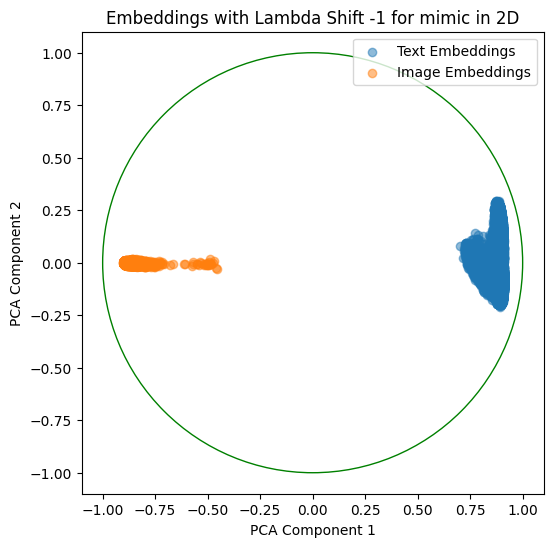

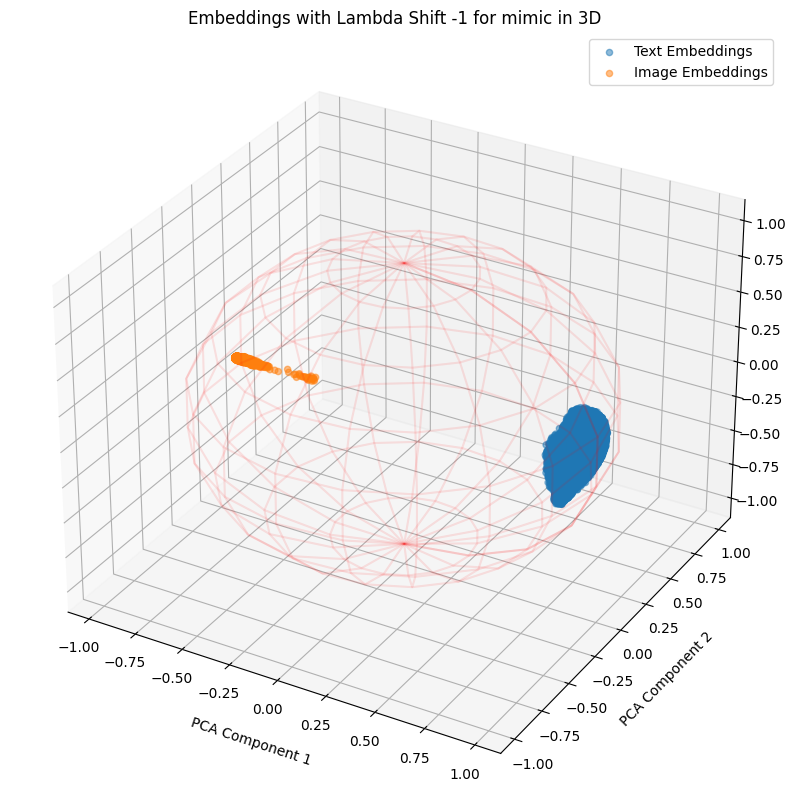

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 36.32 seconds
Total Training Time per Epoch: 1816.23 seconds
Average Inference Time per Epoch: 5.72 seconds
Total Inference Time per Epoch: 285.89 seconds


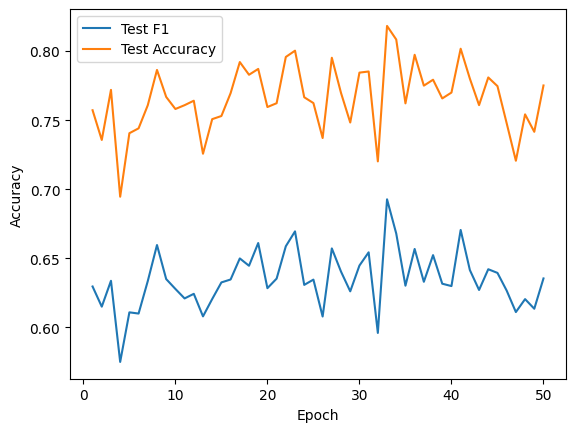

Best Accuracy: {'Acc': 0.8181818181818182, 'F1': 0.6927032628761416, 'Epoch': 33}
Best Macro-F1: {'Acc': 0.8181818181818182, 'F1': 0.6927032628761416, 'Epoch': 33}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 30.45 seconds
Total Training Time per Epoch: 1522.65 seconds
Average Inference Time per Epoch: 5.60 seconds
Total Inference Time per Epoch: 280.18 seconds


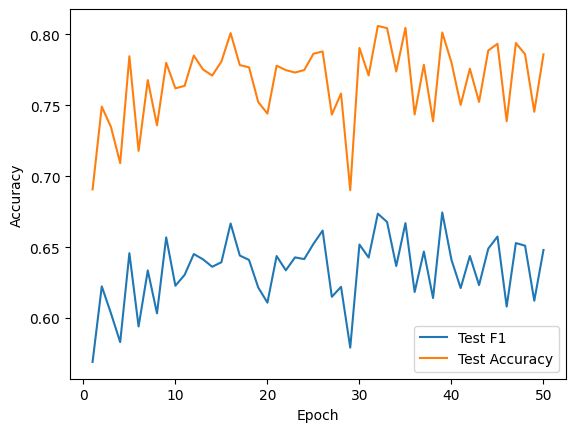

Best Accuracy: {'Acc': 0.805862977602108, 'F1': 0.6735634601146419, 'Epoch': 32}
Best Macro-F1: {'Acc': 0.8012516469038208, 'F1': 0.6744251771260059, 'Epoch': 39}
##################################################  Shift -0.9  ##################################################


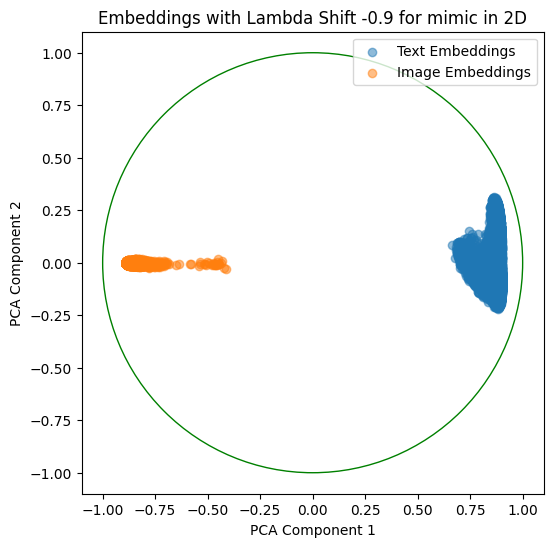

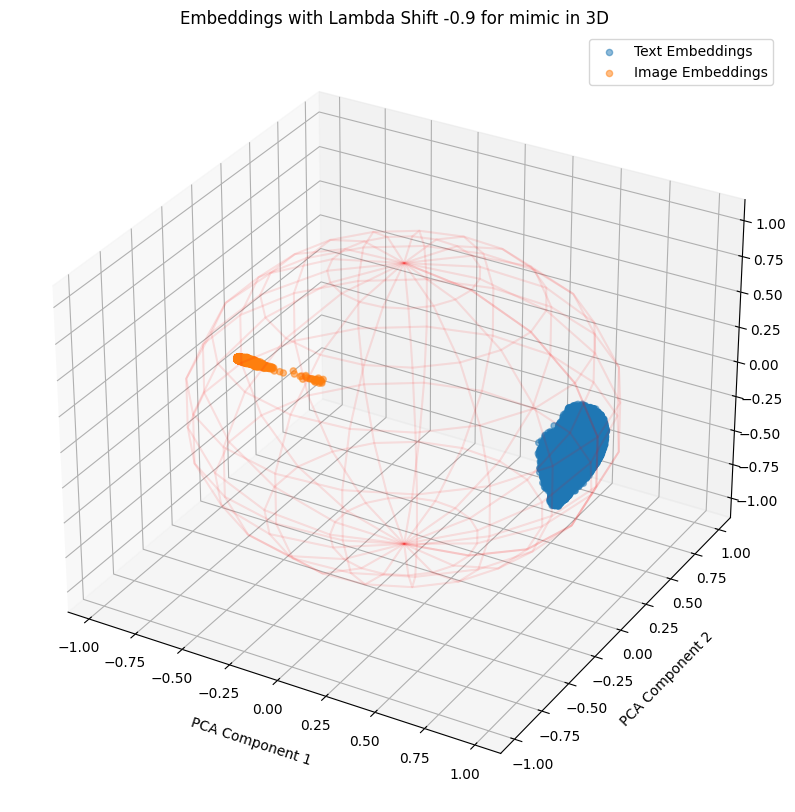

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 20.93 seconds
Total Training Time per Epoch: 1046.38 seconds
Average Inference Time per Epoch: 3.36 seconds
Total Inference Time per Epoch: 167.86 seconds


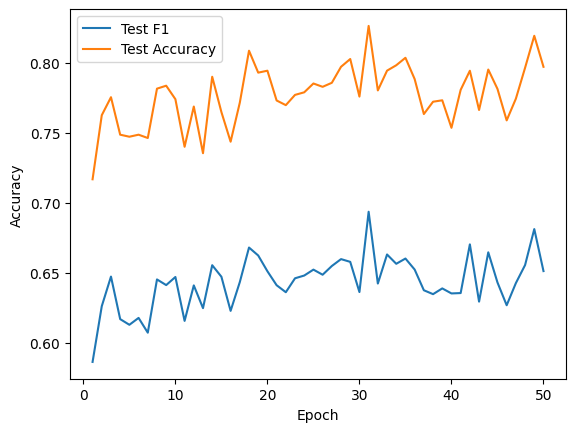

Best Accuracy: {'Acc': 0.8262845849802372, 'F1': 0.6937082755248297, 'Epoch': 31}
Best Macro-F1: {'Acc': 0.8262845849802372, 'F1': 0.6937082755248297, 'Epoch': 31}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.42 seconds
Total Training Time per Epoch: 920.76 seconds
Average Inference Time per Epoch: 3.37 seconds
Total Inference Time per Epoch: 168.43 seconds


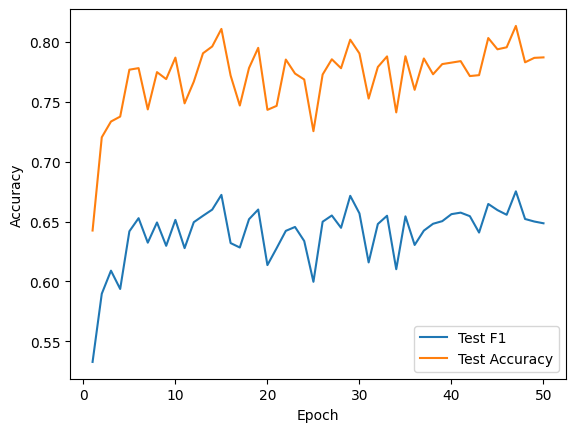

Best Accuracy: {'Acc': 0.8134716732542819, 'F1': 0.6752641823294541, 'Epoch': 47}
Best Macro-F1: {'Acc': 0.8134716732542819, 'F1': 0.6752641823294541, 'Epoch': 47}
##################################################  Shift -0.8  ##################################################


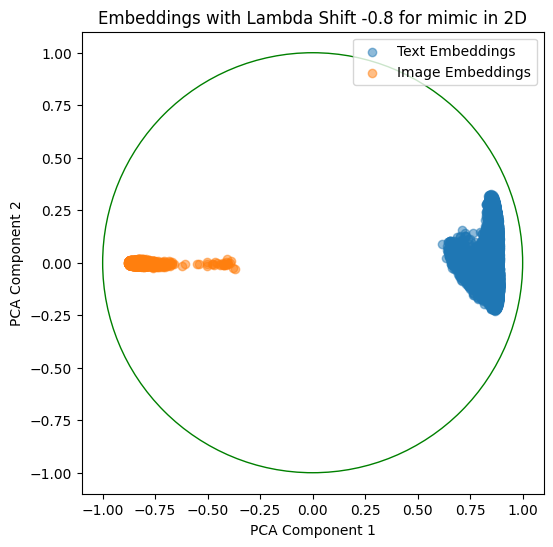

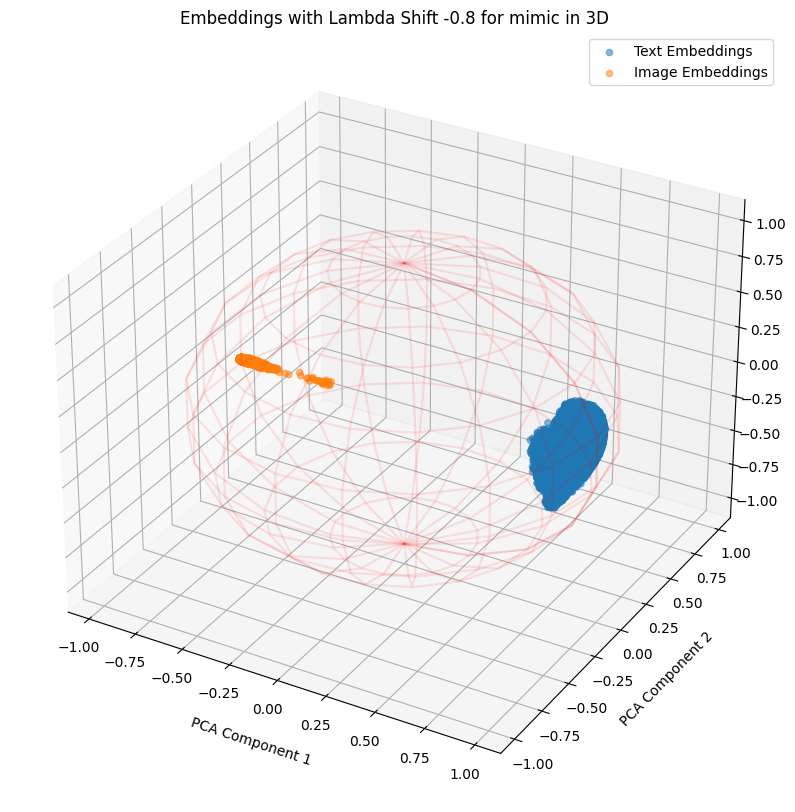

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.31 seconds
Total Training Time per Epoch: 1065.69 seconds
Average Inference Time per Epoch: 3.34 seconds
Total Inference Time per Epoch: 167.19 seconds


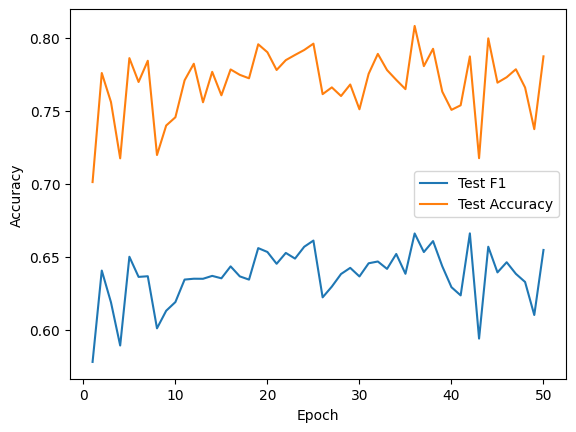

Best Accuracy: {'Acc': 0.8082345191040843, 'F1': 0.6659476257643561, 'Epoch': 36}
Best Macro-F1: {'Acc': 0.7873188405797101, 'F1': 0.6660173265786805, 'Epoch': 42}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.22 seconds
Total Training Time per Epoch: 911.18 seconds
Average Inference Time per Epoch: 3.33 seconds
Total Inference Time per Epoch: 166.27 seconds


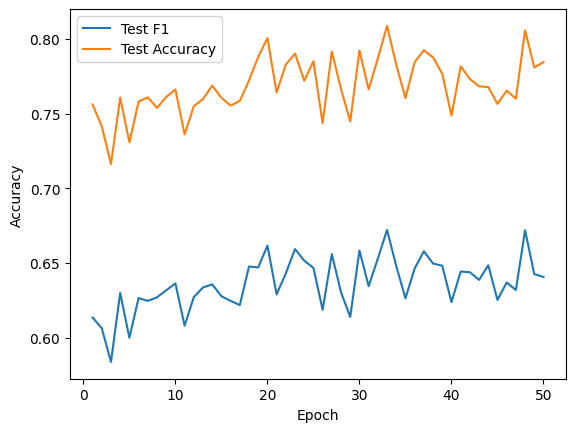

Best Accuracy: {'Acc': 0.8087285902503294, 'F1': 0.6721033169194189, 'Epoch': 33}
Best Macro-F1: {'Acc': 0.8087285902503294, 'F1': 0.6721033169194189, 'Epoch': 33}
##################################################  Shift -0.7  ##################################################


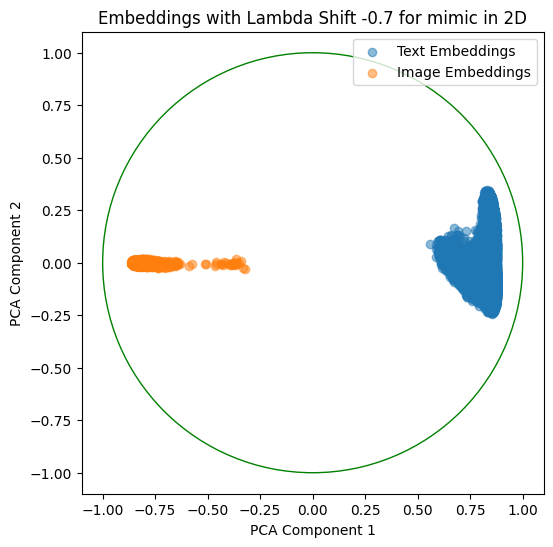

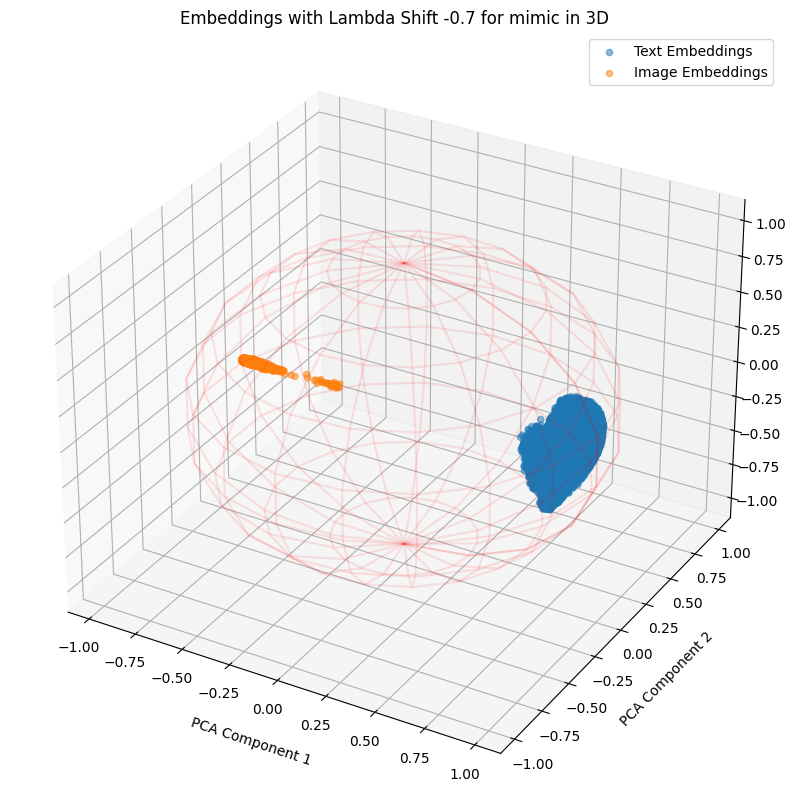

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 20.77 seconds
Total Training Time per Epoch: 1038.60 seconds
Average Inference Time per Epoch: 2.96 seconds
Total Inference Time per Epoch: 147.83 seconds


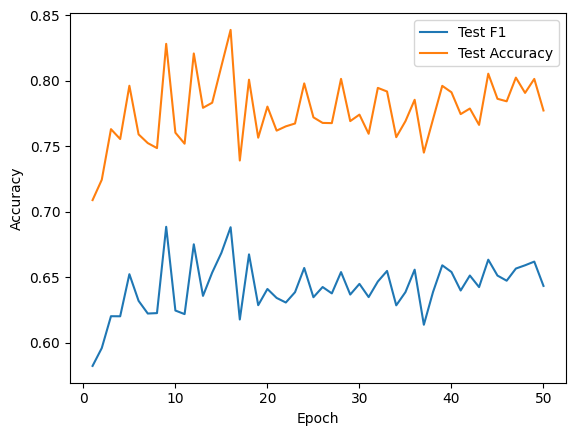

Best Accuracy: {'Acc': 0.838965744400527, 'F1': 0.6882764514927068, 'Epoch': 16}
Best Macro-F1: {'Acc': 0.8283267457180501, 'F1': 0.6886076462912833, 'Epoch': 9}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 17.64 seconds
Total Training Time per Epoch: 881.89 seconds
Average Inference Time per Epoch: 2.94 seconds
Total Inference Time per Epoch: 146.96 seconds


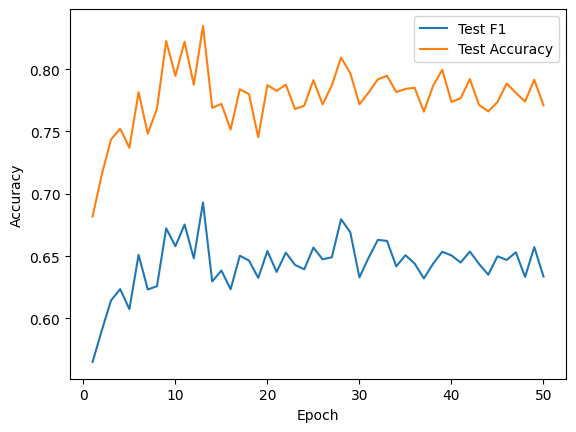

Best Accuracy: {'Acc': 0.8346837944664032, 'F1': 0.6930561743293818, 'Epoch': 13}
Best Macro-F1: {'Acc': 0.8346837944664032, 'F1': 0.6930561743293818, 'Epoch': 13}
##################################################  Shift -0.6  ##################################################


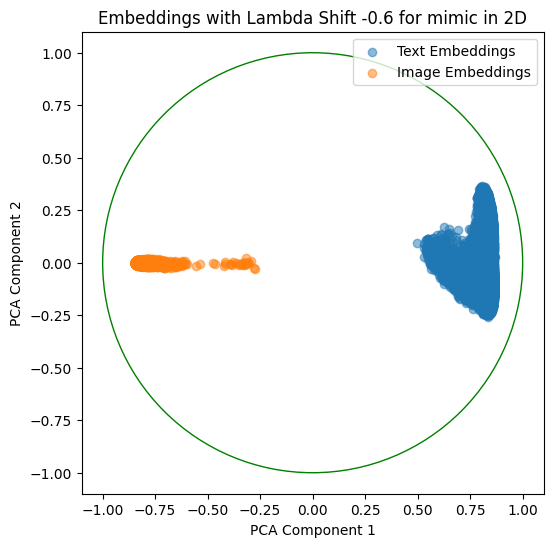

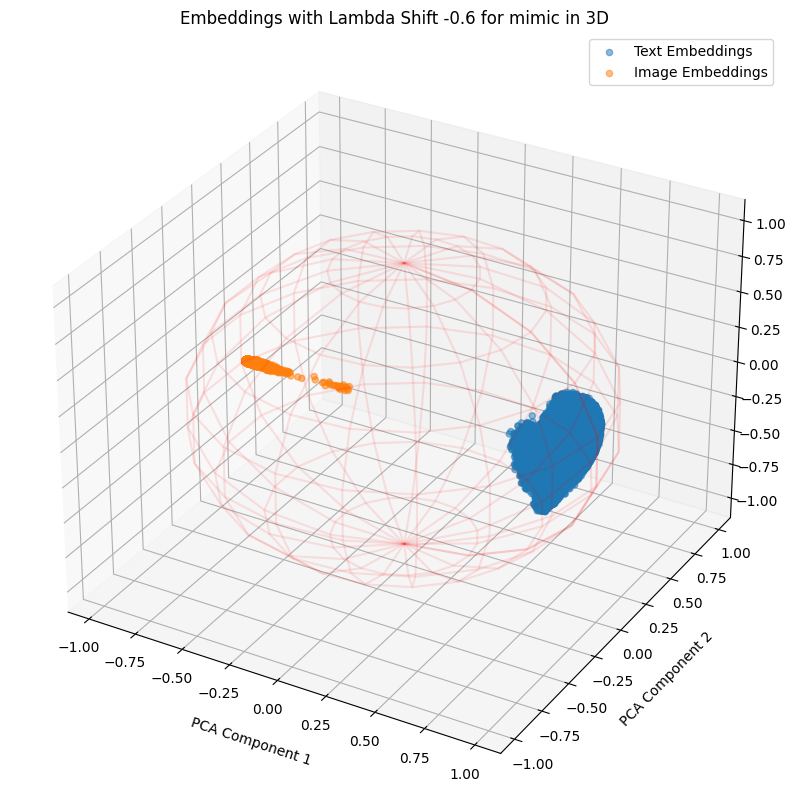

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 20.29 seconds
Total Training Time per Epoch: 1014.74 seconds
Average Inference Time per Epoch: 3.40 seconds
Total Inference Time per Epoch: 170.15 seconds


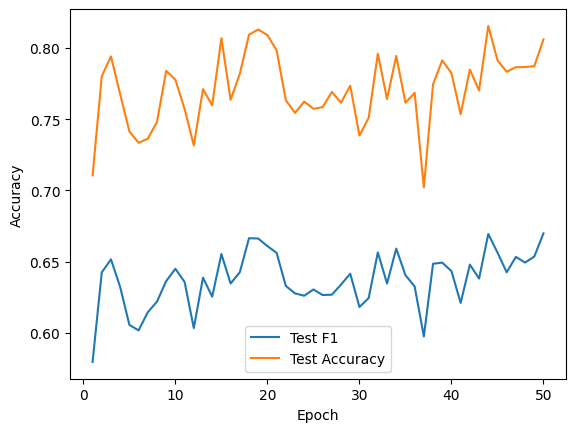

Best Accuracy: {'Acc': 0.8155138339920949, 'F1': 0.6694622664502023, 'Epoch': 44}
Best Macro-F1: {'Acc': 0.8060935441370224, 'F1': 0.6699254842740433, 'Epoch': 50}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 17.89 seconds
Total Training Time per Epoch: 894.51 seconds
Average Inference Time per Epoch: 3.40 seconds
Total Inference Time per Epoch: 170.19 seconds


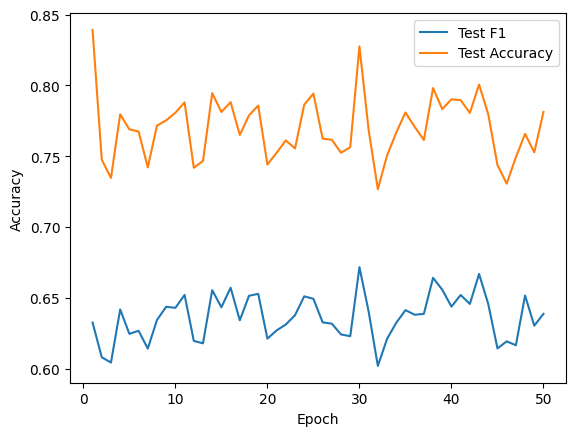

Best Accuracy: {'Acc': 0.8391963109354413, 'F1': 0.6326140344977189, 'Epoch': 1}
Best Macro-F1: {'Acc': 0.8275691699604744, 'F1': 0.6717022431616144, 'Epoch': 30}
##################################################  Shift -0.5  ##################################################


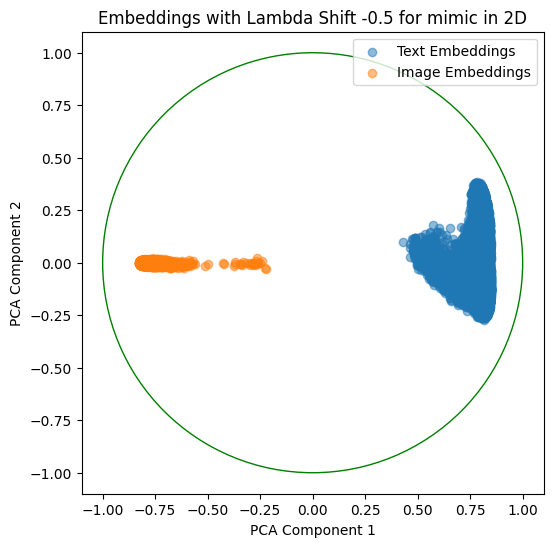

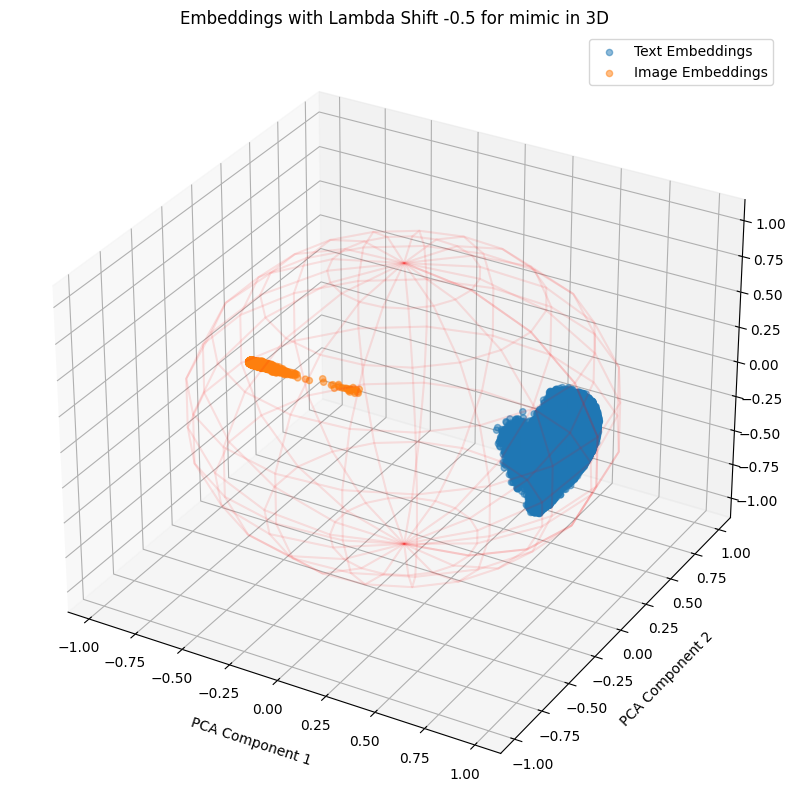

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.06 seconds
Total Training Time per Epoch: 1052.82 seconds
Average Inference Time per Epoch: 3.41 seconds
Total Inference Time per Epoch: 170.54 seconds


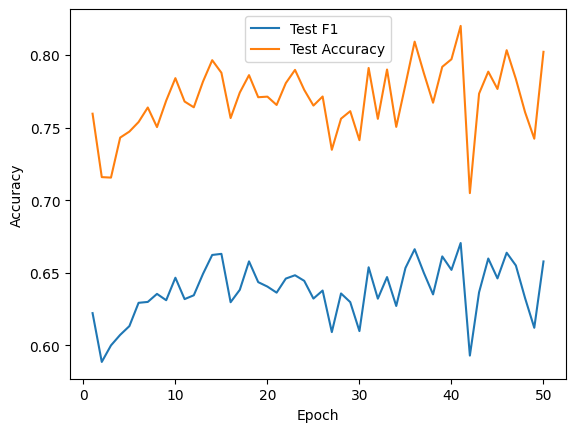

Best Accuracy: {'Acc': 0.8201251646903821, 'F1': 0.6704931328399999, 'Epoch': 41}
Best Macro-F1: {'Acc': 0.8201251646903821, 'F1': 0.6704931328399999, 'Epoch': 41}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.56 seconds
Total Training Time per Epoch: 928.00 seconds
Average Inference Time per Epoch: 3.43 seconds
Total Inference Time per Epoch: 171.43 seconds


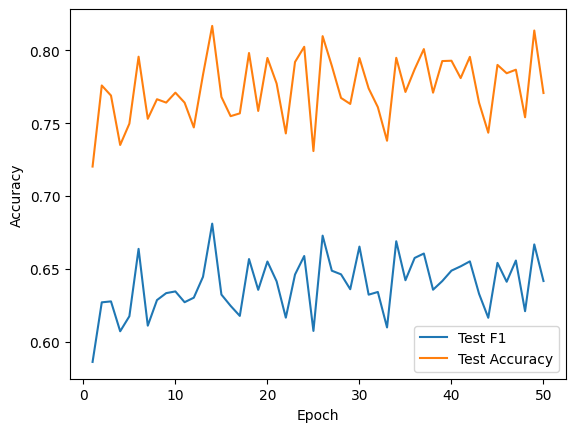

Best Accuracy: {'Acc': 0.8168642951251647, 'F1': 0.6810331345364538, 'Epoch': 14}
Best Macro-F1: {'Acc': 0.8168642951251647, 'F1': 0.6810331345364538, 'Epoch': 14}
##################################################  Shift -0.4  ##################################################


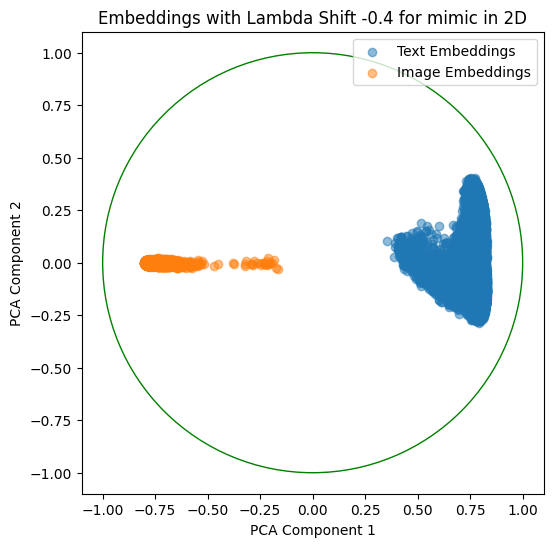

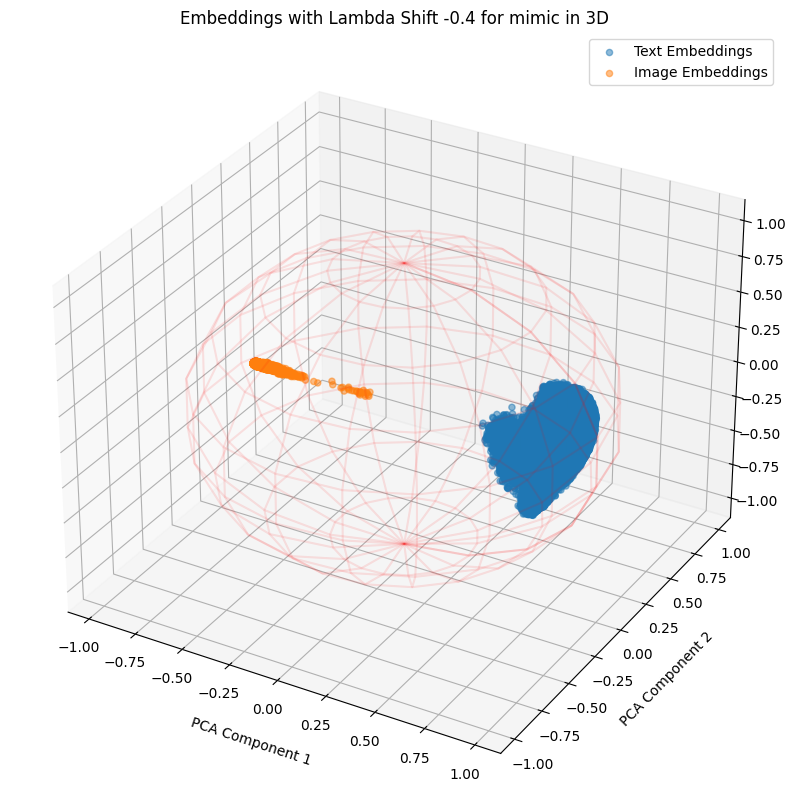

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 20.45 seconds
Total Training Time per Epoch: 1022.45 seconds
Average Inference Time per Epoch: 3.46 seconds
Total Inference Time per Epoch: 173.07 seconds


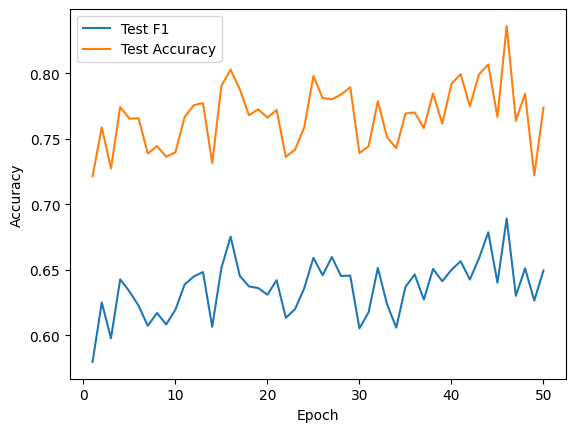

Best Accuracy: {'Acc': 0.8361660079051383, 'F1': 0.6891541208471796, 'Epoch': 46}
Best Macro-F1: {'Acc': 0.8361660079051383, 'F1': 0.6891541208471796, 'Epoch': 46}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.15 seconds
Total Training Time per Epoch: 907.37 seconds
Average Inference Time per Epoch: 3.46 seconds
Total Inference Time per Epoch: 172.94 seconds


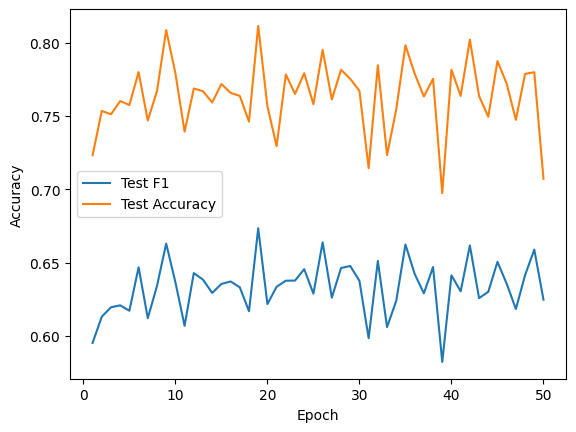

Best Accuracy: {'Acc': 0.8115283267457181, 'F1': 0.6733855551612246, 'Epoch': 19}
Best Macro-F1: {'Acc': 0.8115283267457181, 'F1': 0.6733855551612246, 'Epoch': 19}
##################################################  Shift -0.3  ##################################################


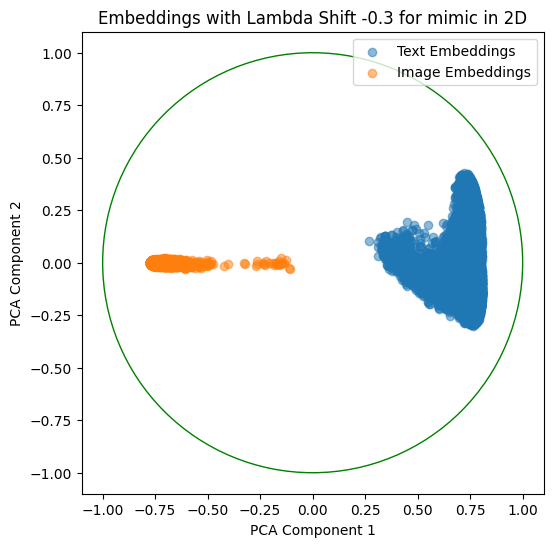

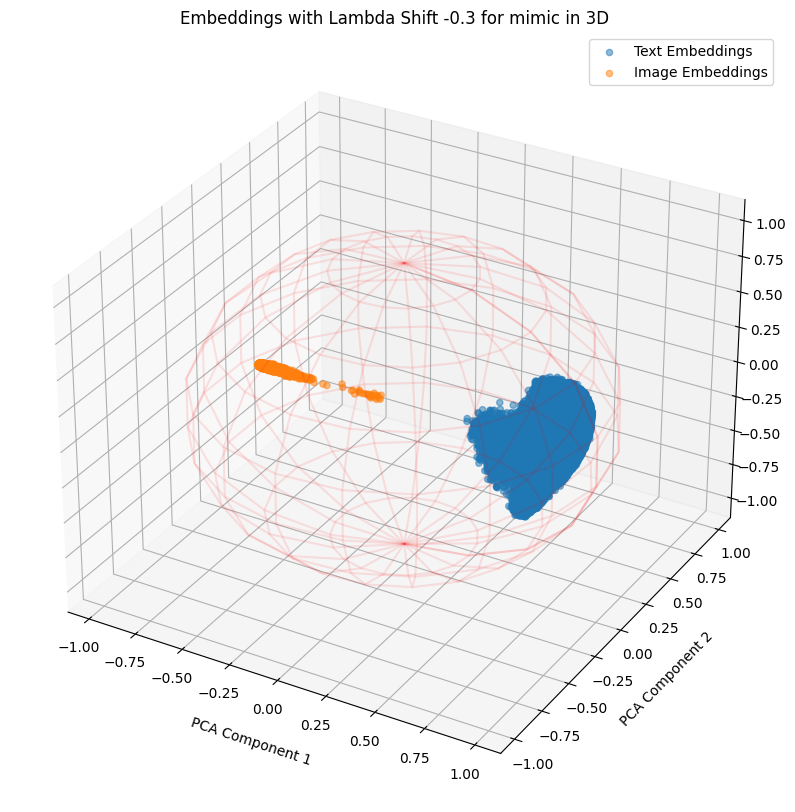

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.44 seconds
Total Training Time per Epoch: 1071.77 seconds
Average Inference Time per Epoch: 3.50 seconds
Total Inference Time per Epoch: 174.98 seconds


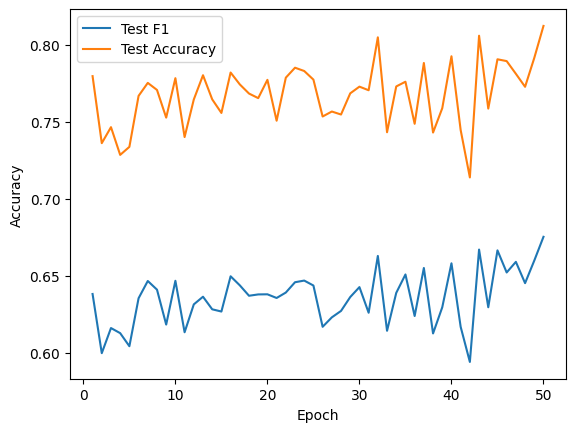

Best Accuracy: {'Acc': 0.8120553359683794, 'F1': 0.6752412574133249, 'Epoch': 50}
Best Macro-F1: {'Acc': 0.8120553359683794, 'F1': 0.6752412574133249, 'Epoch': 50}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.22 seconds
Total Training Time per Epoch: 911.02 seconds
Average Inference Time per Epoch: 3.50 seconds
Total Inference Time per Epoch: 175.20 seconds


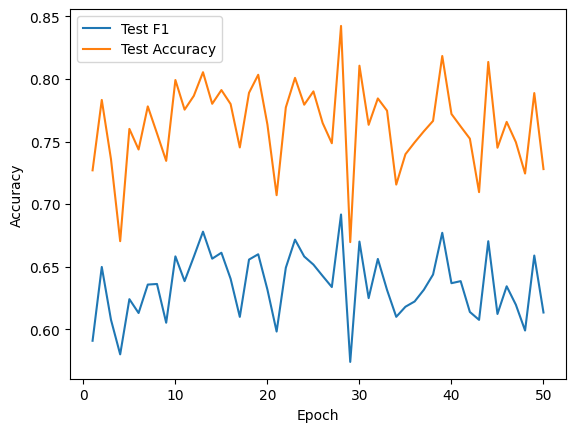

Best Accuracy: {'Acc': 0.8423583662714097, 'F1': 0.6916830395905615, 'Epoch': 28}
Best Macro-F1: {'Acc': 0.8423583662714097, 'F1': 0.6916830395905615, 'Epoch': 28}
##################################################  Shift -0.2  ##################################################


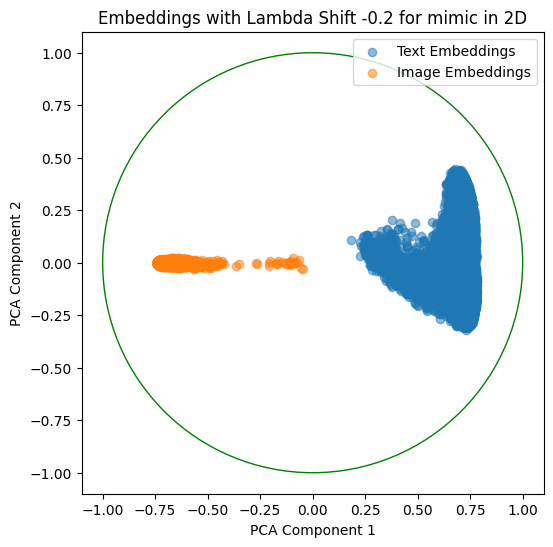

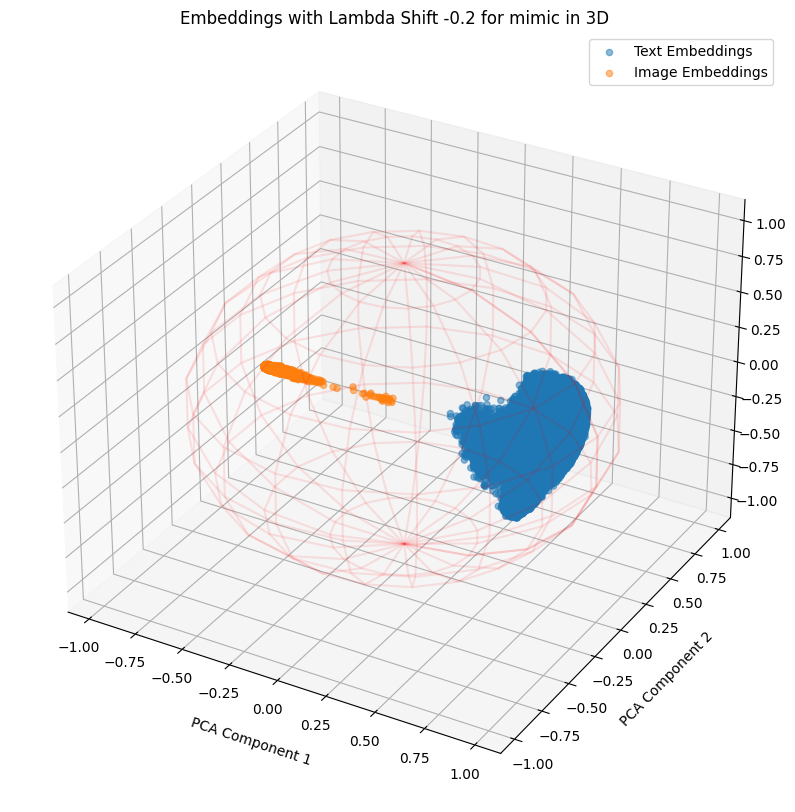

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 22.12 seconds
Total Training Time per Epoch: 1106.05 seconds
Average Inference Time per Epoch: 3.49 seconds
Total Inference Time per Epoch: 174.47 seconds


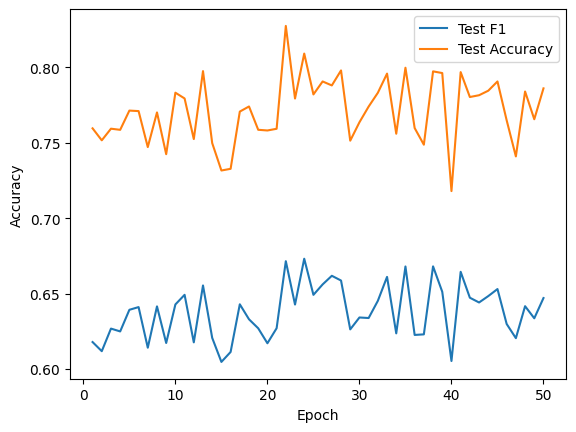

Best Accuracy: {'Acc': 0.82733860342556, 'F1': 0.6714934470536584, 'Epoch': 22}
Best Macro-F1: {'Acc': 0.8090250329380764, 'F1': 0.673110838989033, 'Epoch': 24}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.73 seconds
Total Training Time per Epoch: 936.51 seconds
Average Inference Time per Epoch: 3.49 seconds
Total Inference Time per Epoch: 174.30 seconds


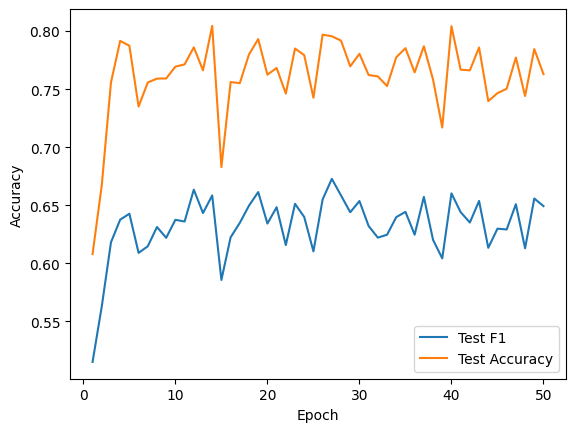

Best Accuracy: {'Acc': 0.8044137022397891, 'F1': 0.6584670100436522, 'Epoch': 14}
Best Macro-F1: {'Acc': 0.7955204216073781, 'F1': 0.672763684292385, 'Epoch': 27}
##################################################  Shift -0.1  ##################################################


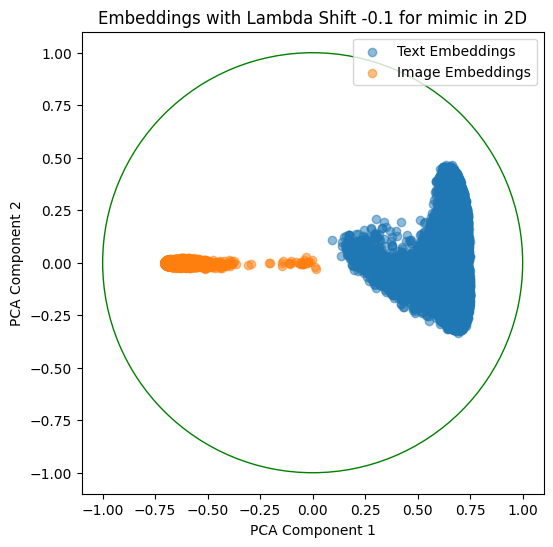

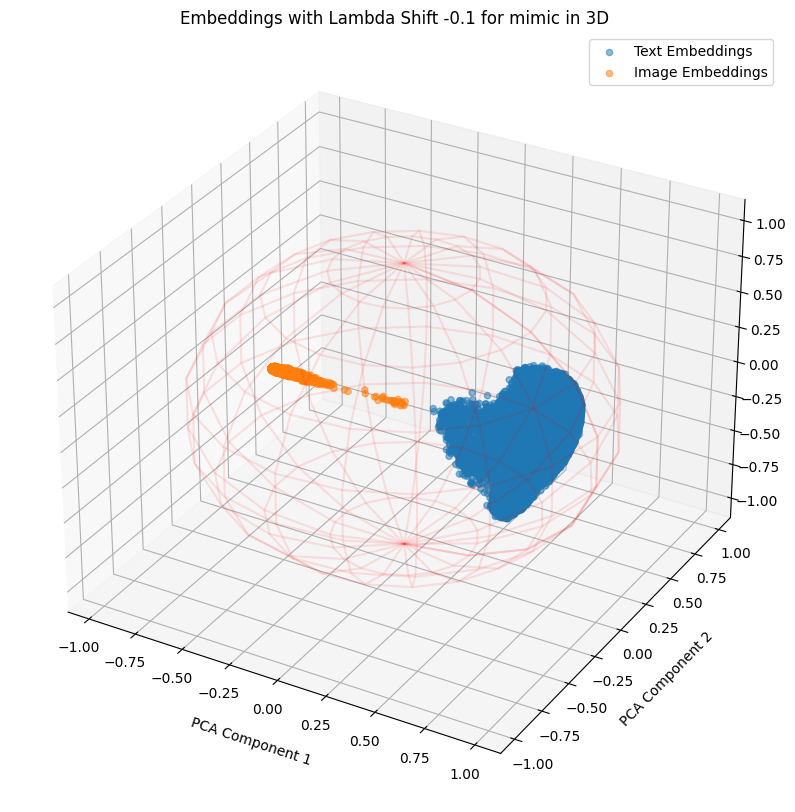

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.19 seconds
Total Training Time per Epoch: 1059.38 seconds
Average Inference Time per Epoch: 3.47 seconds
Total Inference Time per Epoch: 173.56 seconds


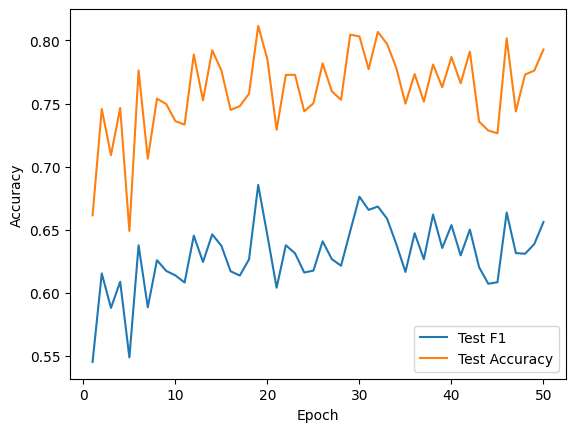

Best Accuracy: {'Acc': 0.8114953886693017, 'F1': 0.6855558949438201, 'Epoch': 19}
Best Macro-F1: {'Acc': 0.8114953886693017, 'F1': 0.6855558949438201, 'Epoch': 19}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 17.37 seconds
Total Training Time per Epoch: 868.70 seconds
Average Inference Time per Epoch: 3.46 seconds
Total Inference Time per Epoch: 172.76 seconds


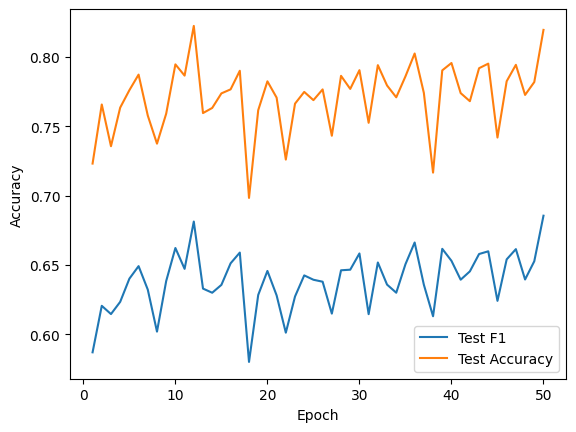

Best Accuracy: {'Acc': 0.8223978919631093, 'F1': 0.6813057143789808, 'Epoch': 12}
Best Macro-F1: {'Acc': 0.819532279314888, 'F1': 0.6855377524178676, 'Epoch': 50}
##################################################  Shift 0  ##################################################


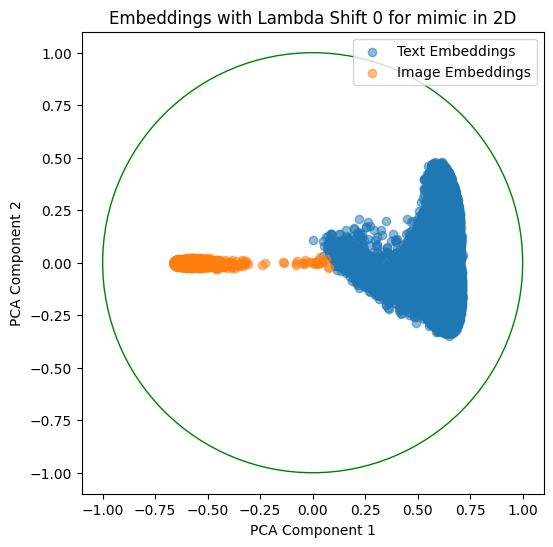

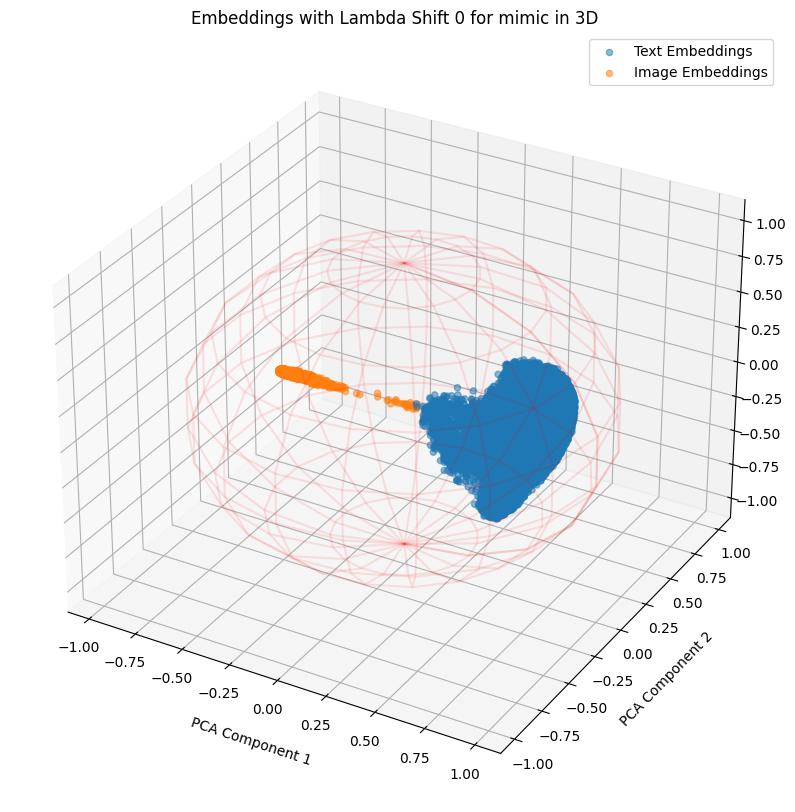

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.72 seconds
Total Training Time per Epoch: 1085.77 seconds
Average Inference Time per Epoch: 3.46 seconds
Total Inference Time per Epoch: 172.79 seconds


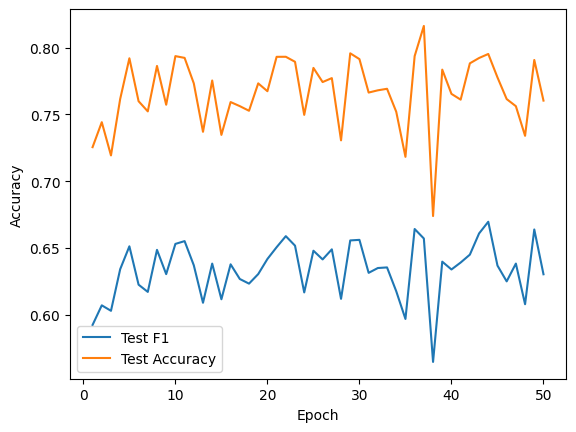

Best Accuracy: {'Acc': 0.816304347826087, 'F1': 0.6570228710845484, 'Epoch': 37}
Best Macro-F1: {'Acc': 0.7952898550724637, 'F1': 0.6695722598042275, 'Epoch': 44}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.22 seconds
Total Training Time per Epoch: 911.18 seconds
Average Inference Time per Epoch: 3.47 seconds
Total Inference Time per Epoch: 173.45 seconds


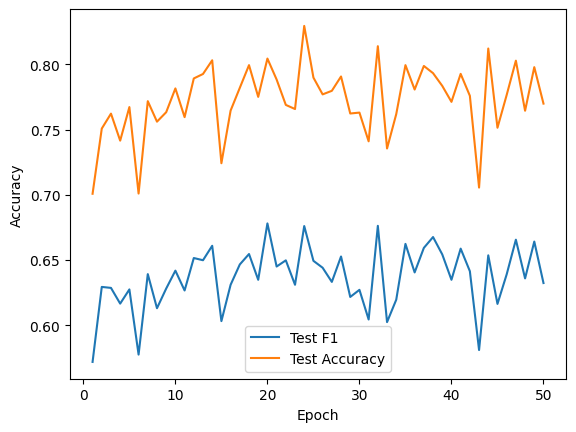

Best Accuracy: {'Acc': 0.8295125164690382, 'F1': 0.6760464279316343, 'Epoch': 24}
Best Macro-F1: {'Acc': 0.8044795783926219, 'F1': 0.6780650221729998, 'Epoch': 20}
##################################################  Shift 0.1  ##################################################


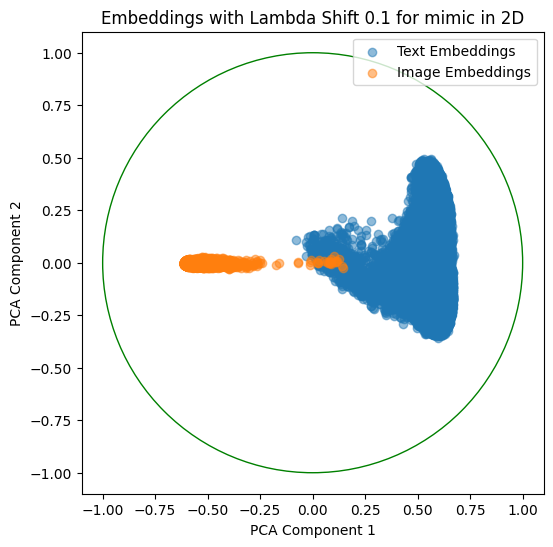

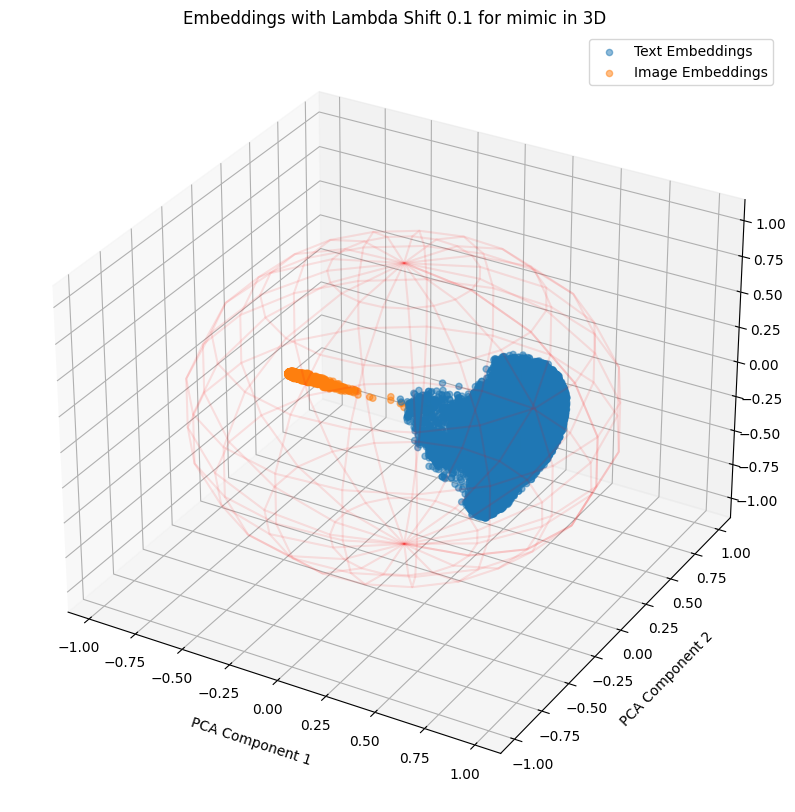

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 20.16 seconds
Total Training Time per Epoch: 1008.07 seconds
Average Inference Time per Epoch: 3.42 seconds
Total Inference Time per Epoch: 171.24 seconds


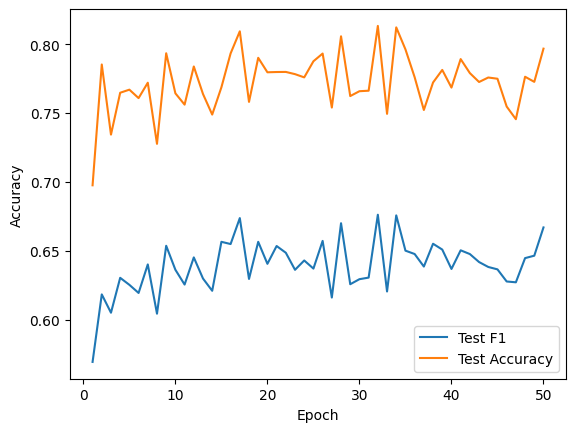

Best Accuracy: {'Acc': 0.8133069828722003, 'F1': 0.6762269094357788, 'Epoch': 32}
Best Macro-F1: {'Acc': 0.8133069828722003, 'F1': 0.6762269094357788, 'Epoch': 32}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 17.56 seconds
Total Training Time per Epoch: 877.97 seconds
Average Inference Time per Epoch: 3.42 seconds
Total Inference Time per Epoch: 170.93 seconds


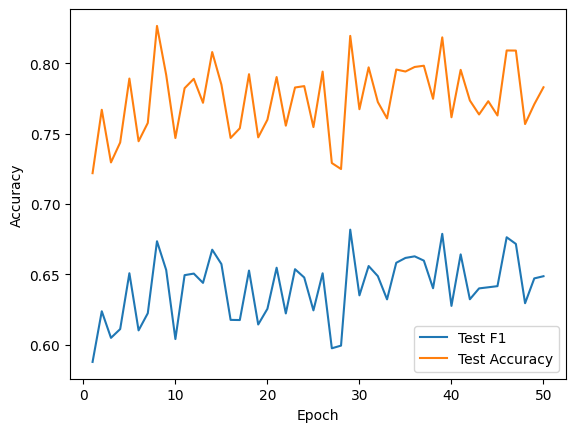

Best Accuracy: {'Acc': 0.8265480895915679, 'F1': 0.6734834956858351, 'Epoch': 8}
Best Macro-F1: {'Acc': 0.8194664031620553, 'F1': 0.6817116950418385, 'Epoch': 29}
##################################################  Shift 0.2  ##################################################


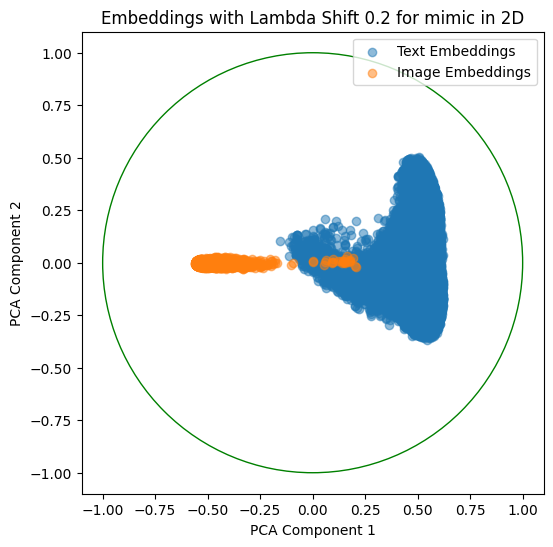

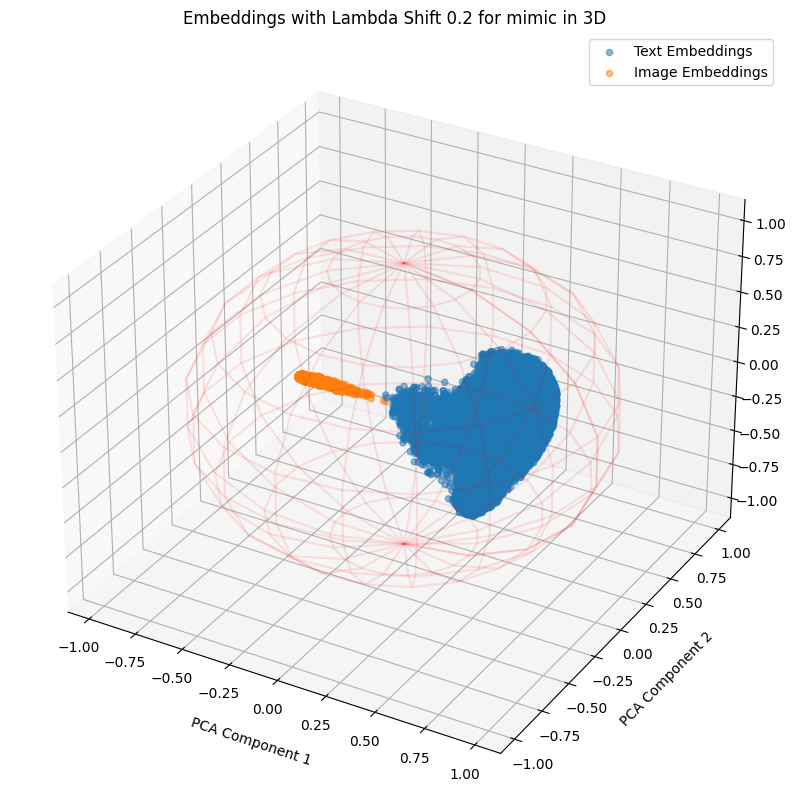

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.30 seconds
Total Training Time per Epoch: 1065.23 seconds
Average Inference Time per Epoch: 3.42 seconds
Total Inference Time per Epoch: 171.08 seconds


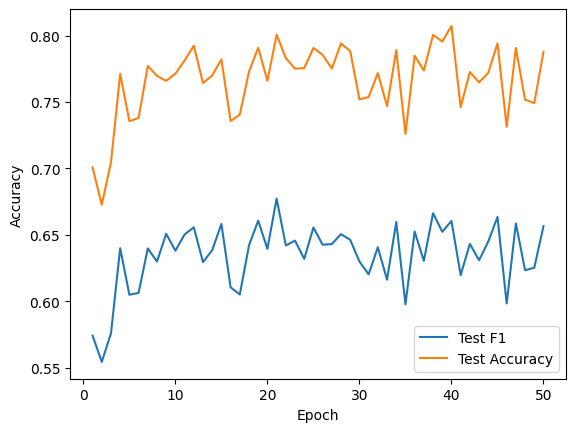

Best Accuracy: {'Acc': 0.8072463768115942, 'F1': 0.6603858841177673, 'Epoch': 40}
Best Macro-F1: {'Acc': 0.8006587615283267, 'F1': 0.6772871096531423, 'Epoch': 21}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.18 seconds
Total Training Time per Epoch: 908.87 seconds
Average Inference Time per Epoch: 3.44 seconds
Total Inference Time per Epoch: 172.02 seconds


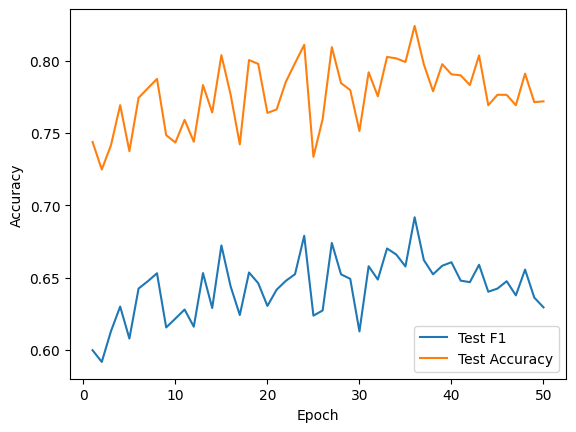

Best Accuracy: {'Acc': 0.8240118577075098, 'F1': 0.6917261817454166, 'Epoch': 36}
Best Macro-F1: {'Acc': 0.8240118577075098, 'F1': 0.6917261817454166, 'Epoch': 36}
##################################################  Shift 0.3  ##################################################


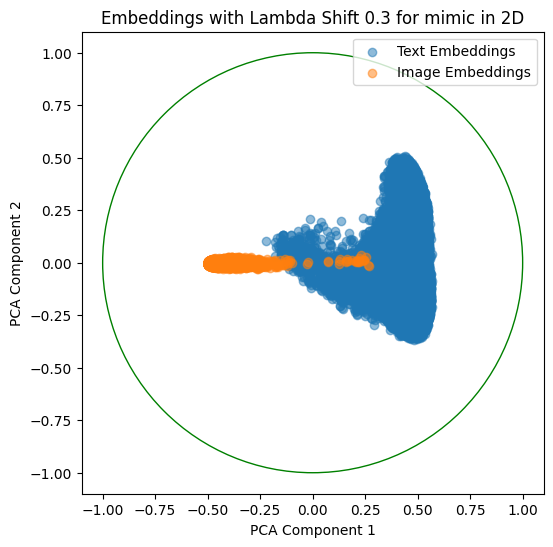

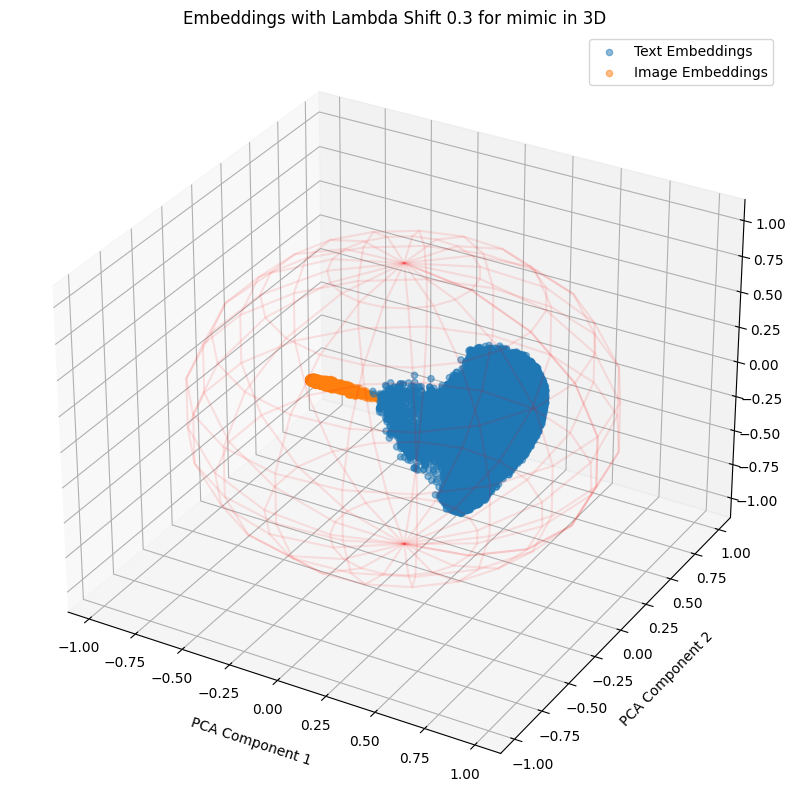

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 20.58 seconds
Total Training Time per Epoch: 1029.00 seconds
Average Inference Time per Epoch: 3.43 seconds
Total Inference Time per Epoch: 171.41 seconds


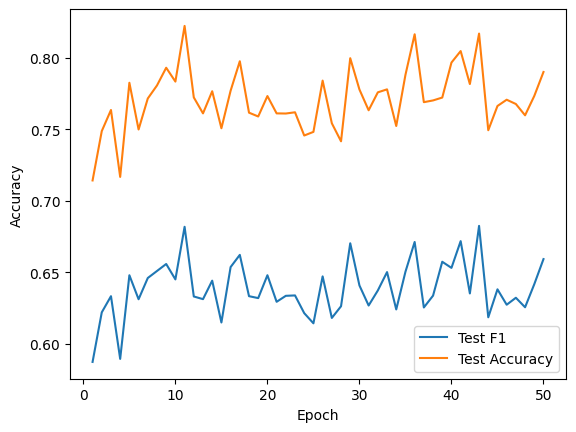

Best Accuracy: {'Acc': 0.822266139657444, 'F1': 0.6817733316457796, 'Epoch': 11}
Best Macro-F1: {'Acc': 0.816897233201581, 'F1': 0.6824172344189384, 'Epoch': 43}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 17.14 seconds
Total Training Time per Epoch: 856.97 seconds
Average Inference Time per Epoch: 3.46 seconds
Total Inference Time per Epoch: 173.11 seconds


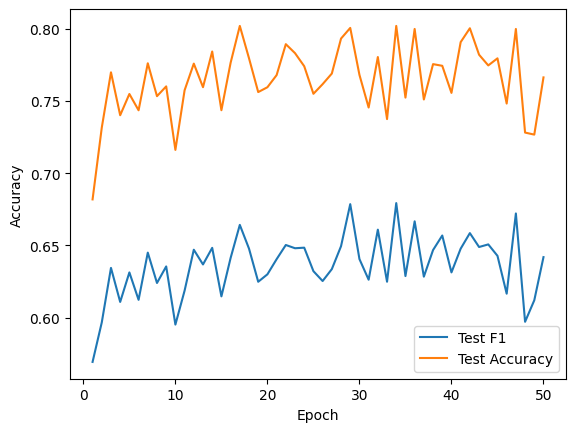

Best Accuracy: {'Acc': 0.8021080368906456, 'F1': 0.6642251570706934, 'Epoch': 17}
Best Macro-F1: {'Acc': 0.8021080368906456, 'F1': 0.6793229541997392, 'Epoch': 34}
##################################################  Shift 0.4  ##################################################


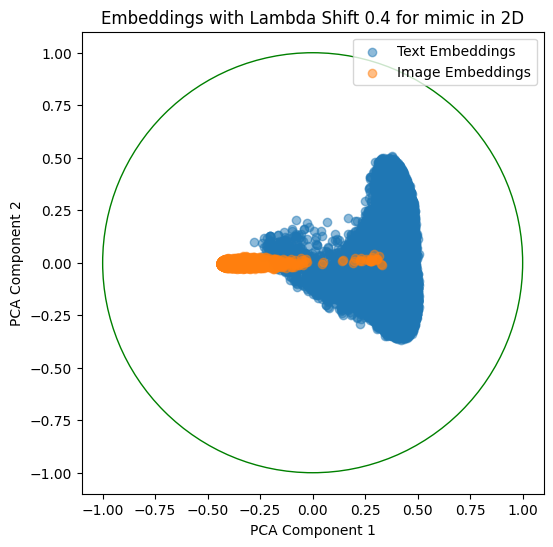

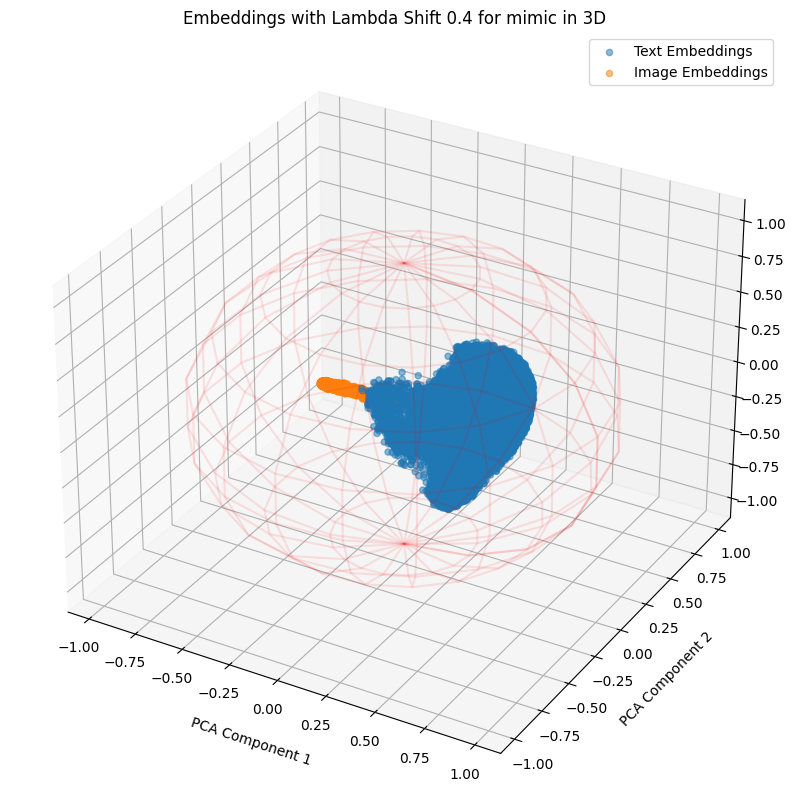

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.85 seconds
Total Training Time per Epoch: 1092.55 seconds
Average Inference Time per Epoch: 3.44 seconds
Total Inference Time per Epoch: 171.85 seconds


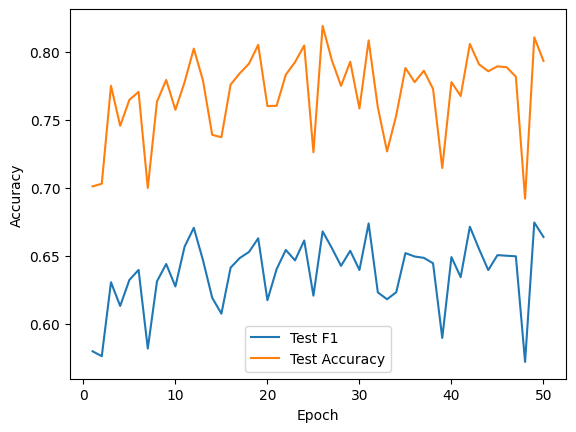

Best Accuracy: {'Acc': 0.8190382081686429, 'F1': 0.6680040968677985, 'Epoch': 26}
Best Macro-F1: {'Acc': 0.8106719367588933, 'F1': 0.6746090752573332, 'Epoch': 49}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.15 seconds
Total Training Time per Epoch: 907.72 seconds
Average Inference Time per Epoch: 3.49 seconds
Total Inference Time per Epoch: 174.41 seconds


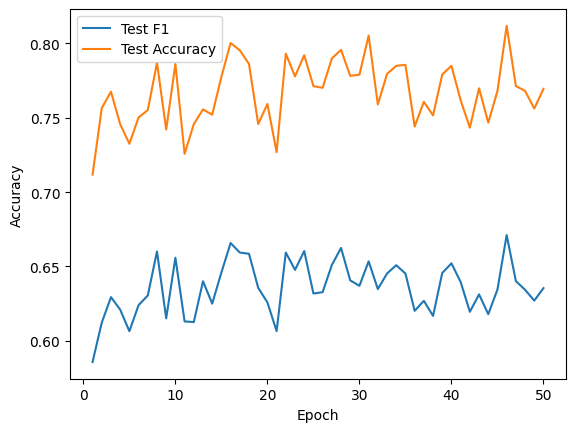

Best Accuracy: {'Acc': 0.811824769433465, 'F1': 0.6711230094513354, 'Epoch': 46}
Best Macro-F1: {'Acc': 0.811824769433465, 'F1': 0.6711230094513354, 'Epoch': 46}
##################################################  Shift 0.5  ##################################################


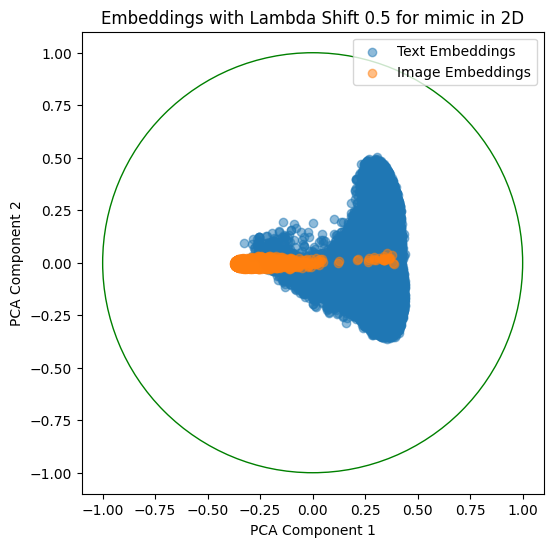

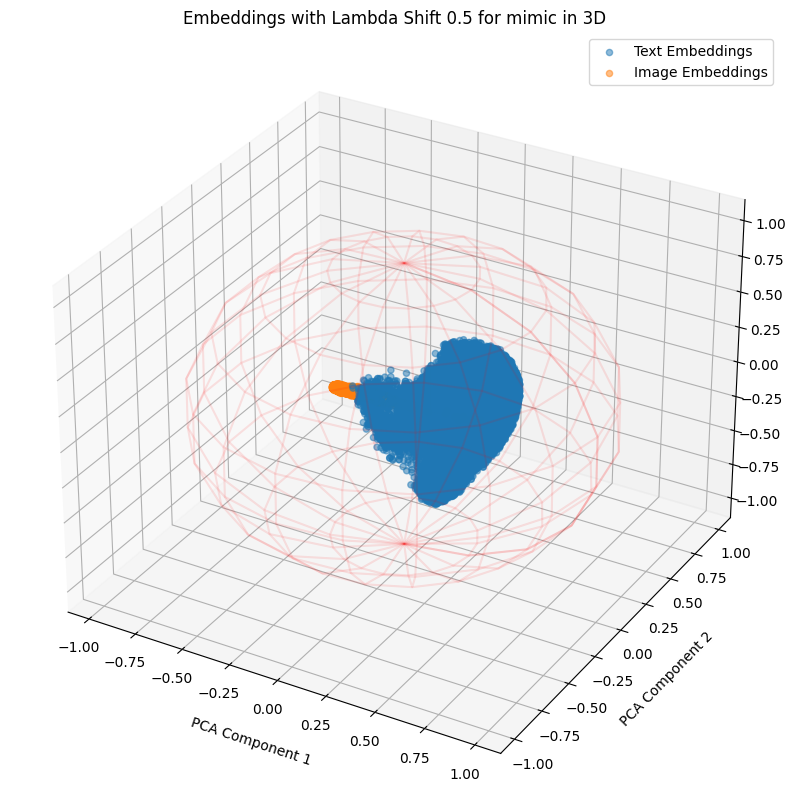

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 20.86 seconds
Total Training Time per Epoch: 1042.78 seconds
Average Inference Time per Epoch: 3.41 seconds
Total Inference Time per Epoch: 170.75 seconds


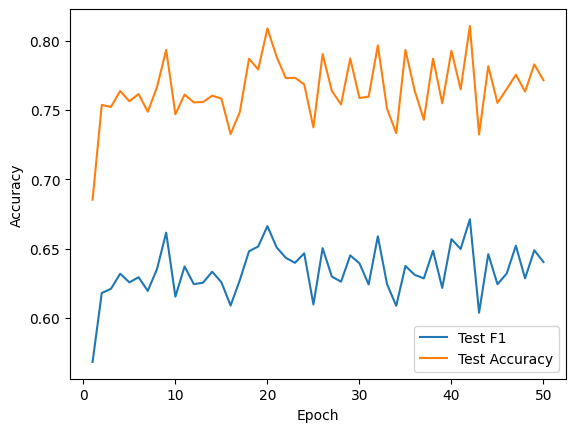

Best Accuracy: {'Acc': 0.8107707509881423, 'F1': 0.6711435727531063, 'Epoch': 42}
Best Macro-F1: {'Acc': 0.8107707509881423, 'F1': 0.6711435727531063, 'Epoch': 42}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 17.90 seconds
Total Training Time per Epoch: 894.94 seconds
Average Inference Time per Epoch: 3.47 seconds
Total Inference Time per Epoch: 173.65 seconds


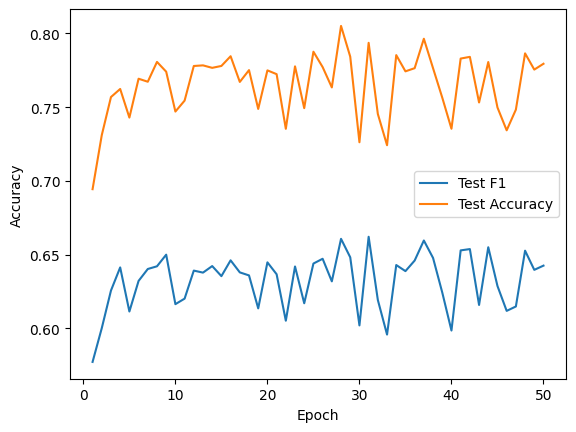

Best Accuracy: {'Acc': 0.8051054018445323, 'F1': 0.6607304711048542, 'Epoch': 28}
Best Macro-F1: {'Acc': 0.7936429512516469, 'F1': 0.662133358995239, 'Epoch': 31}
##################################################  Shift 0.6  ##################################################


In [ ]:
# Assuming df is your DataFrame
lambda_shift_values = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # Negative values bring embeddings closer, positive values push them apart
#lambda_shift_values = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]  # Negative values bring embeddings closer, positive values push them apart

# Normalize initial embeddings
df[text_columns] = normalize_embeddings(df[text_columns].values)
df[image_columns] = normalize_embeddings(df[image_columns].values)

# Dataframe with shifted values:
df_shifted = df.copy()

results = {}

for lambda_shift in lambda_shift_values:
    
    print('#'*50, f' Shift {lambda_shift} ', '#'*50)
    
    # Extract embeddings
    text_embeddings = df[text_columns].values
    image_embeddings = df[image_columns].values
    
    # Modify and normalize embeddings
    text_embeddings_shifted, image_embeddings_shifted = modify_and_normalize_embeddings(text_embeddings, image_embeddings, lambda_shift)
    
    # Update column names based on the new dimensions
    if text_embeddings.shape[1] < text_embeddings_shifted.shape[1]:
        text_columns_updated = update_column_names(text_columns, text_embeddings_shifted.shape[1])
    else: 
        text_columns_updated = text_columns
        
    if image_embeddings.shape[1] < image_embeddings_shifted.shape[1]: 
        image_columns_updated = update_column_names(image_columns, image_embeddings_shifted.shape[1])
    else:
        image_columns_updated = image_columns
    
    # Update DataFrame with shifted embeddings
    df_shifted[text_columns_updated] = text_embeddings_shifted
    df_shifted[image_columns_updated] = image_embeddings_shifted
    
    # Visualize shifted embeddings
    visualize_embeddings(text_embeddings_shifted, image_embeddings_shifted, f'Embeddings with Lambda Shift {lambda_shift} for {DATASET}', lambda_shift, DATASET)
    
    # Split the data
    train_df, test_df = split_data(df_shifted)
    
    
    # Process and one-hot encode labels for training set
    train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
    test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)

    train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
    test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    text_input_size = len(text_columns)
    image_input_size = len(image_columns)

    ### Models:
    # Train early fusion model
    print("Training Early Fusion Model:")
    accuracy, precision, recall, f1, best = train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    
    results[f"early_({lambda_shift})"] = best
    
    # Train late fusion model
    print("Training Late Fusion Model:")
    accuracy, precision, recall, f1, best = train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    
    results[f"late_({lambda_shift})"] = best

In [ ]:
print('Results Early Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'early_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'early_({lambda_shift})']['Macro-F1']}")
    
print('Results Late Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'late_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'late_({lambda_shift})']['Macro-F1']}")

In [ ]:
plot_results(results, lambda_shift_values, DATASET)